In [11]:
import numpy as np
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


from sklearn.model_selection import train_test_split
from sklearn.metrics import (roc_curve, auc, accuracy_score) 
from sklearn.metrics import roc_auc_score


from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

In [ ]:
# PassengerId – 乗客識別ユニークID
# Survived – 生存フラグ（0=死亡、1=生存）
# Pclass – チケットクラス
# Name – 乗客の名前
# Sex – 性別（male=男性、female＝女性）
# Age – 年齢
# SibSp – タイタニックに同乗している兄弟/配偶者の数
# parch – タイタニックに同乗している親/子供の数
# ticket – チケット番号
# fare – 料金
# cabin – 客室番号
# Embarked – 出港地（タイタニックへ乗った港）

In [12]:
# データ取り込み
train = pd.read_csv("titanic_train.csv")
test = pd.read_csv("titanic_test.csv")


# 列削除
train_x = train.drop(["Survived", "Name", "Cabin", "Ticket", "PassengerId"], axis=1)
test_x = test.drop(["Name", "Cabin", "Ticket", "PassengerId"], axis=1)


# Survived列のみ抽出
train_y = train["Survived"]


# 欠損値を年齢の中央値。出港地は最多のSで補完
train_x["Age"] = train_x["Age"].fillna(train_x["Age"].median())
train_x["Embarked"] = train_x["Embarked"].fillna("S")

test_x["Age"] = test_x["Age"].fillna(test_x["Age"].median())
test_x["Fare"] = test_x["Fare"].fillna(test_x["Fare"].median())
test_x["Embarked"] = test_x["Embarked"].fillna("S")


# Sex、Embarked列をダミー変換
train_x_dummy = pd.get_dummies(train_x,columns=["Sex","Embarked"])
test_x_dummy = pd.get_dummies(test_x,columns=["Sex","Embarked"])


# 説明変数、目的変数分割
X_train, X_test, y_train, y_test = train_test_split(train_x_dummy, train_y, test_size=0.3, random_state=101)

RandomForestClassifier
accuracy of train set: 0.9807383627608347
accuracy of test set: 0.7910447761194029
AUC curve : 0.859507


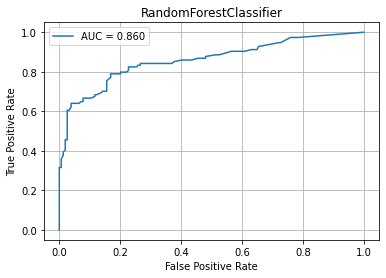

XGBClassifier
accuracy of train set: 0.8892455858747994
accuracy of test set: 0.8134328358208955
AUC curve : 0.858282


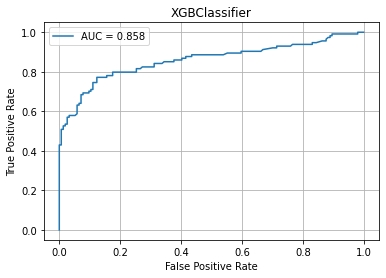

LGBMClassifier
accuracy of train set: 0.9470304975922953
accuracy of test set: 0.8208955223880597
AUC curve : 0.877649


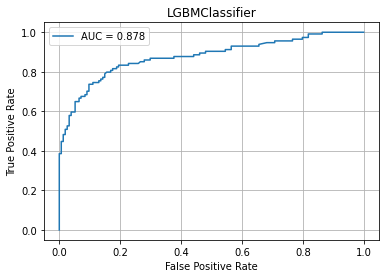

LogisticRegression
accuracy of train set: 0.8154093097913323
accuracy of test set: 0.7835820895522388
AUC curve : 0.852415


/Users/shunnadamoto/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


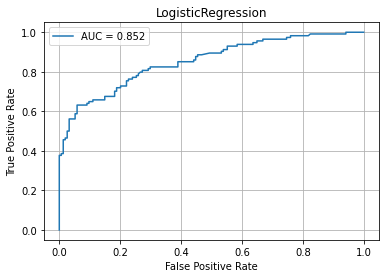

SVM
accuracy of train set: 0.6886035313001605
accuracy of test set: 0.6529850746268657
AUC curve : 0.780816


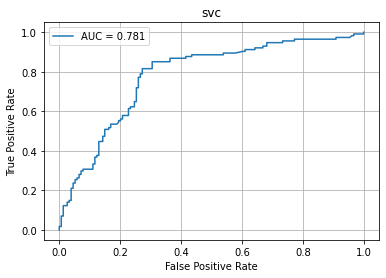

DecisionTree
accuracy of train set: 0.9807383627608347
accuracy of test set: 0.7798507462686567
AUC curve : 0.784404


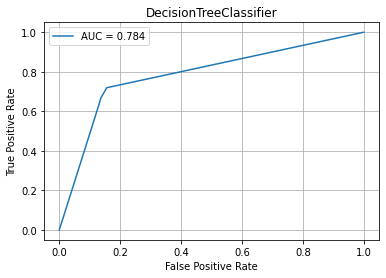

In [33]:
# scikit-learnでROC曲線　Receiver operating characteristic（受信者操作特性）
# AUC(Area under the curve)を算出

# FPR: false positive rate（偽陽性率） ■陰性を間違って陽性と判定した割合 ■小さい方が良い
# TPR: true positive rate（真陽性率）　　■陽性を正しく陽性と判定した割合 ■大きいほうが良い
# thresholds(閾値)



# インスタンス化
rfc = RandomForestClassifier()
# 学習
rfc.fit(X_train, y_train)

print('='*40)
print('RandomForestClassifier')
print(f'accuracy of train set: {rfc.score(X_train, y_train)}')
print(f'accuracy of test set: {rfc.score(X_test, y_test)}')


# 0に分類されるか、1に分類されるかを0-1の連続値で表す(足したら1に等しくなる)
# scilit-learn 閾値デフォルト = 0.5
y_proba = rfc.predict_proba(X_test)[: , 1]
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)
print ("AUC curve : %f" % roc_auc)

auc_score = roc_auc_score(y_test, y_proba)
plt.plot(fpr, tpr, label='AUC = %.3f' % (auc_score))
plt.legend()
plt.title('RandomForestClassifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)
plt.show()





xgb = XGBClassifier(random_state=0)
xgb.fit(X_train, y_train)
print('='*40)
print('XGBClassifier')
print(f'accuracy of train set: {xgb.score(X_train, y_train)}')
print(f'accuracy of test set: {xgb.score(X_test, y_test)}')

y_proba = xgb.predict_proba(X_test)[: , 1]
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)
print ("AUC curve : %f" % roc_auc)

auc_score = roc_auc_score(y_test, y_proba)
plt.plot(fpr, tpr, label='AUC = %.3f' % (auc_score))
plt.legend()
plt.title('XGBClassifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)
plt.show()





lgb = LGBMClassifier(random_state=0)
lgb.fit(X_train, y_train)
print('='*40)
print('LGBMClassifier')
print(f'accuracy of train set: {lgb.score(X_train, y_train)}')
print(f'accuracy of test set: {lgb.score(X_test, y_test)}')

y_proba = lgb.predict_proba(X_test)[: , 1]
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)
print ("AUC curve : %f" % roc_auc)

auc_score = roc_auc_score(y_test, y_proba)
plt.plot(fpr, tpr, label='AUC = %.3f' % (auc_score))
plt.legend()
plt.title('LGBMClassifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)
plt.show()





lr = LogisticRegression(random_state=0)
lr.fit(X_train, y_train)
print('='*40)
print('LogisticRegression')
print(f'accuracy of train set: {lr.score(X_train, y_train)}')
print(f'accuracy of test set: {lr.score(X_test, y_test)}')

y_proba = lr.predict_proba(X_test)[: , 1]
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)
print ("AUC curve : %f" % roc_auc)

auc_score = roc_auc_score(y_test, y_proba)
plt.plot(fpr, tpr, label='AUC = %.3f' % (auc_score))
plt.legend()
plt.title('LogisticRegression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)
plt.show()





svc = SVC(probability=True)
svc.fit(X_train, y_train)
print('='*40)
print('SVM')
print(f'accuracy of train set: {svc.score(X_train, y_train)}')
print(f'accuracy of test set: {svc.score(X_test, y_test)}')

y_proba = svc.predict_proba(X_test)[: , 1]
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)
print ("AUC curve : %f" % roc_auc)

auc_score = roc_auc_score(y_test, y_proba)
plt.plot(fpr, tpr, label='AUC = %.3f' % (auc_score))
plt.legend()
plt.title('svc')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)
plt.show()





clf = DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
print('='*40)
print('DecisionTree')
print(f'accuracy of train set: {clf.score(X_train, y_train)}')
print(f'accuracy of test set: {clf.score(X_test, y_test)}')

y_proba = clf.predict_proba(X_test)[: , 1]
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)
print ("AUC curve : %f" % roc_auc)

auc_score = roc_auc_score(y_test, y_proba)
plt.plot(fpr, tpr, label='AUC = %.3f' % (auc_score))
plt.legend()
plt.title('DecisionTreeClassifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)
plt.show()




========================================<br>
RandomForestClassifier<br>
accuracy of train set: 0.9807383627608347<br>
accuracy of test set: 0.8022388059701493<br>
AUC curve : 0.861928<br>
========================================<br>
XGBClassifier<br>
accuracy of train set: 0.8892455858747994<br>
accuracy of test set: 0.8134328358208955<br>
AUC curve : 0.858282<br>
========================================<br>
LGBMClassifier<br>
accuracy of train set: 0.9470304975922953<br>
accuracy of test set: 0.8208955223880597<br>
AUC curve : 0.877649<br>
========================================<br>
LogisticRegression<br>
accuracy of train set: 0.8154093097913323<br>
accuracy of test set: 0.7835820895522388<br>
AUC curve : 0.852415<br>
========================================<br>
SVM<br>
accuracy of train set: 0.6886035313001605<br>
accuracy of test set: 0.6529850746268657<br>
AUC curve : 0.780816<br>
========================================<br>
DecisionTree<br>
accuracy of train set: 0.9807383627608347<br>
accuracy of test set: 0.7873134328358209<br>
AUC curve : 0.791467<br>

LGBMClassifier >> RandomForestClassifier >> XGBClassifier >> LogisticRegression >> DecisionTree >> SVM

In [32]:
# from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# print('confusion matrix = \n', confusion_matrix(y_test, predictions))
# print('accuracy = ', accuracy_score(y_test, predictions))
# print('precision = ', precision_score(y_test, predictions))
# print('recall = ', recall_score(y_test, predictions))
# print('f1 score = ', f1_score(y_test, predictions))


# 真陽性（TP: True Positive）: 実際のクラスが陽性で予測も陽性（正解）
# 真陰性（TN: True Negative）: 実際のクラスが陰性で予測も陰性（正解）
# 偽陽性（FP: False Positive）: 実際のクラスは陰性で予測が陽性（不正解）
# 偽陰性（FN: False Negative）: 実際のクラスは陽性で予測が陰性（不正解）